# Fashion-MNIST Training Only (PyTorch)
- CPU/GPU自動切替
- ハイパーパラメータの最適化
- 学習時間の計測
- 各エポック進捗表示
- 学習後に評価と学習曲線のプロット

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time

In [2]:
# ハイパーパラメータ
batch_size = 8
epochs = 3
learning_rate = 0.01
hidden_units = 32

In [3]:
# デバイスの自動選択
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [4]:
# データセットの読み込み
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|███████████████████████████████████| 26.4M/26.4M [02:20<00:00, 188kB/s]
100%|██████████████████████████████████| 29.5k/29.5k [00:00<00:00, 31.4kB/s]
100%|███████████████████████████████████| 4.42M/4.42M [00:26<00:00, 165kB/s]
100%|██████████████████████████████████| 5.15k/5.15k [00:00<00:00, 17.0kB/s]


In [6]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
# ネットワーク定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x    

In [8]:
# 学習ループ
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []

start_time = time.time()
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}] complete. Avg loss: {running_loss/len(train_loader):.4f}")
    
end_time = time.time()
print(f"\nTraining completed in {(end_time - start_time):.2f} seconds")

Epoch [1/3], Step [0/7500], Loss: 2.3080
Epoch [1/3], Step [100/7500], Loss: 0.7656
Epoch [1/3], Step [200/7500], Loss: 0.2998
Epoch [1/3], Step [300/7500], Loss: 0.5776
Epoch [1/3], Step [400/7500], Loss: 1.0531
Epoch [1/3], Step [500/7500], Loss: 0.6261
Epoch [1/3], Step [600/7500], Loss: 2.1250
Epoch [1/3], Step [700/7500], Loss: 0.9866
Epoch [1/3], Step [800/7500], Loss: 0.7790
Epoch [1/3], Step [900/7500], Loss: 0.4678
Epoch [1/3], Step [1000/7500], Loss: 0.8165
Epoch [1/3], Step [1100/7500], Loss: 0.5521
Epoch [1/3], Step [1200/7500], Loss: 1.0721
Epoch [1/3], Step [1300/7500], Loss: 1.1811
Epoch [1/3], Step [1400/7500], Loss: 0.4922
Epoch [1/3], Step [1500/7500], Loss: 0.5579
Epoch [1/3], Step [1600/7500], Loss: 0.2592
Epoch [1/3], Step [1700/7500], Loss: 0.8253
Epoch [1/3], Step [1800/7500], Loss: 2.0030
Epoch [1/3], Step [1900/7500], Loss: 0.5804
Epoch [1/3], Step [2000/7500], Loss: 0.7962
Epoch [1/3], Step [2100/7500], Loss: 1.0112
Epoch [1/3], Step [2200/7500], Loss: 0.3174


In [9]:
# 学習後にテスト精度を表示
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 75.96%


In [10]:
# プロットして、ファイルに保存
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.savefig("training_loss_curve.png")  # ← ファイルとして保存
plt.close()  # メモリ解放のため、プロットを閉じる

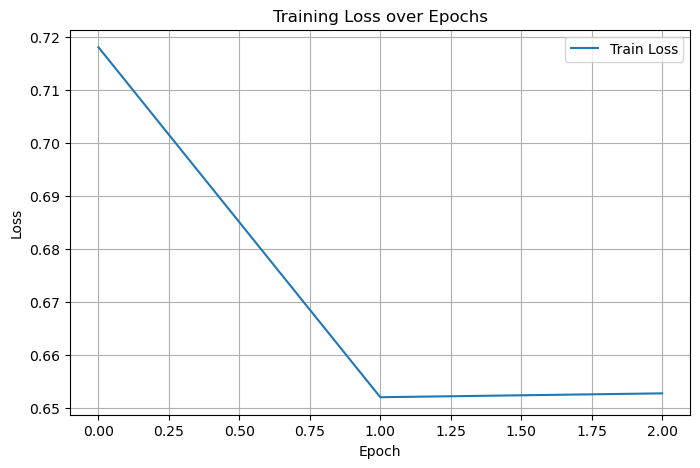

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()